In [1]:
import pandas as pd
from collections import Counter
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Oracle accuracy computation

In [34]:
oracle = pd.read_csv('../data/oracles/oracle_labels_everyone.csv',encoding='utf=8')

In [35]:
def f(row):
    items = [row['Susana'],row['Pratyusha'],row['Derek'],row['Andy']]
    c = Counter(items)
    return c.most_common()[0][0]

In [36]:
oracle['Human Judgment'] = oracle.apply(f,axis=1)

In [37]:
gold = pd.read_csv('../data/oracles/oracle_with_labels.csv',encoding='utf-8')

In [38]:
gold

,Unnamed: 0,Unnamed: 0.1,count,hate_speech,offensive_language,neither,class,tweet
0,2281,2326,3,0,3,0,1,934 8616\ni got a missed call from yo bitch
1,15914,16283,3,0,3,0,1,RT @KINGTUNCHI_: Fucking with a bad bitch you ...
2,18943,19362,3,0,1,2,2,RT @eanahS__: @1inkkofrosess lol my credit ain...
3,16407,16780,3,0,3,0,1,RT @Maxin_Betha Wipe the cum out of them faggo...
4,13326,13654,3,1,2,0,1,Niggas cheat on they bitch and don't expect no...
5,12914,13233,3,0,3,0,1,Mother asked what I wanted for Christmas this ...
6,21457,21919,3,0,3,0,1,That's real dedication. .. &#171;@arigold_88 T...
7,12246,12557,6,0,6,0,1,"Kiss IMO this conductor, it's 4:30 AM have som..."
8,13083,13404,6,0,6,0,1,My momma keep talking to me like bitch gtf I'm...
9,19409,19839,3,0,3,0,1,RT @karlos_budah: I kno this bitch a thot she ...


In [40]:
oracle[['tweet','Human Judgment']].merge(gold[['tweet','class']],on='tweet')

,tweet,Human Judgment,class
0,934 8616\ni got a missed call from yo bitch,0,1
1,RT @KINGTUNCHI_: Fucking with a bad bitch you ...,0,1
2,RT @eanahS__: @1inkkofrosess lol my credit ain...,1,2
3,RT @Maxin_Betha Wipe the cum out of them faggo...,1,1
4,Niggas cheat on they bitch and don't expect no...,1,1
5,Mother asked what I wanted for Christmas this ...,0,1
6,That's real dedication. .. &#171;@arigold_88 T...,0,1
7,"Kiss IMO this conductor, it's 4:30 AM have som...",1,1
8,My momma keep talking to me like bitch gtf I'm...,1,1
9,RT @karlos_budah: I kno this bitch a thot she ...,1,1


In [41]:
finalJudgments = oracle[['tweet','Human Judgment']].merge(gold[['tweet','class']],on='tweet')

In [42]:
def g(row):
    if row['class'] == 2:
        return 0
    elif row['class'] == 0:
        return 2
    else:
        return 1

In [43]:
finalJudgments['new_class'] = finalJudgments.apply(g,axis=1)

In [44]:
finalJudgments

,tweet,Human Judgment,class,new_class
0,934 8616\ni got a missed call from yo bitch,0,1,1
1,RT @KINGTUNCHI_: Fucking with a bad bitch you ...,0,1,1
2,RT @eanahS__: @1inkkofrosess lol my credit ain...,1,2,0
3,RT @Maxin_Betha Wipe the cum out of them faggo...,1,1,1
4,Niggas cheat on they bitch and don't expect no...,1,1,1
5,Mother asked what I wanted for Christmas this ...,0,1,1
6,That's real dedication. .. &#171;@arigold_88 T...,0,1,1
7,"Kiss IMO this conductor, it's 4:30 AM have som...",1,1,1
8,My momma keep talking to me like bitch gtf I'm...,1,1,1
9,RT @karlos_budah: I kno this bitch a thot she ...,1,1,1


In [45]:
print(classification_report(finalJudgments[['new_class']], finalJudgments[['Human Judgment']]))

              precision    recall  f1-score   support

           0       0.30      0.94      0.46        18
           1       0.88      0.49      0.63        76
           2       1.00      0.33      0.50         6

   micro avg       0.56      0.56      0.56       100
   macro avg       0.73      0.59      0.53       100
weighted avg       0.78      0.56      0.59       100



### Baseline accuracy 

In [2]:
train = pd.read_csv('../data/train/training_data.csv',encoding='utf-8')

In [ ]:
print(classification_report(train[['class']], [1]*train.shape[0]))

In [31]:
val = pd.read_csv('../data/dev/development_data.csv',encoding='utf-8')

In [28]:
val.shape

(2469, 8)

In [27]:
test = pd.read_csv('../data/test/testing_data.csv',encoding='utf-8')

In [32]:
print(classification_report(val[['class']], [1]*val.shape[0]))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       123
           1       0.79      1.00      0.88      1947
           2       0.00      0.00      0.00       398

   micro avg       0.79      0.79      0.79      2468
   macro avg       0.26      0.33      0.29      2468
weighted avg       0.62      0.79      0.70      2468



/Users/pratyusha/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [3]:
train.shape

(19746, 8)

In [46]:
df = pd.read_csv('../../cs_221/hate-speech-and-offensive-language/data/labeled_data.csv',encoding='utf-8')

labels = [row['class'] for index,row in df.iterrows()]
Counter(labels)

19190.0/ (19190+1430+4163)

0.7743211072105879

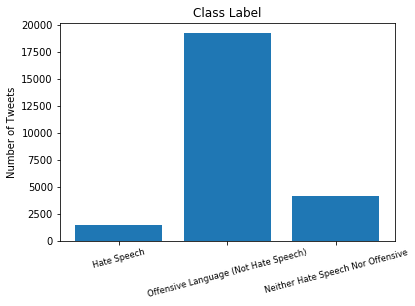

In [30]:
objects = ('Hate Speech', 'Offensive Language (Not Hate Speech)', 'Neither Hate Speech Nor Offensive')
y_pos = np.arange(len(objects))
performance = [1430,19190,4163]

plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects,rotation=15,fontsize='small')
plt.ylabel('Number of Tweets')
plt.title('Class Label')

plt.show()


In [11]:
train[train['class'] == 0].iloc[0].loc['tweet']

"Think it's okay to take my property and break it? Fuck you bitch"

In [16]:
train[train['class'] == 1].iloc[50].loc['tweet']

"I'm bringing booty back. Go ahead and tell them skinny bitches that."

In [24]:
train[train['class'] == 2].iloc[500].loc['tweet']

'This 8 yr old on #masterchefjunior made my chicken look like trash.'